# Startup Success Predictor

### Libraries

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, roc_curve

In [196]:
startups = pd.read_csv("C:/Users/ppasc/OneDrive/Desktop/Data Mining/startup_traction.csv")
startups.head()

,Unnamed: 0,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
0,669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,NaN,917744355,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1236,ADVANCED MATERIALS SRL,ITALY,LAIVES,http://www.airlite.eu,935677812,1,INCEPTION,636.0,170.550314,...,0.031447,0.035273,547.0,0.964727,0.860063,547.0,0.964727,0.860063,71.408805,0
2,1643,GRAPHENEA SA,SPAIN,SAN SEBASTIAN GUIPUZCOA,http://www.graphenea.com,971995582,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,331,CROIVALVE LIMITED,IRELAND,DUBLIN,http://www.croivalve.com,909573463,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,614,OU COGNUSE,ESTONIA,TALLINN,http://www.cognuse.com,916757671,1,INCEPTION,126.0,137.015873,...,0.031746,0.001584,96.0,0.038020,0.761905,96.0,0.038020,0.761905,5.880952,0


In [197]:
px.histogram(startups, x="country")

In [198]:
px.scatter(startups, x="PIC")

In [199]:
px.scatter(startups, x="tweet_count", color= "country")

In [200]:
px.scatter(startups, x="tweet_length", color= "country")

In [201]:
px.scatter(startups, x="tweet_rate", color= "country")

In [202]:
px.scatter_3d(startups, x="tweet_count", y="tweet_length", z="tweet_rate", color= "country").update_traces(marker=dict(size=4))

In [203]:
px.histogram(startups, x="tweet_count")

In [204]:
px.histogram(startups, x="engagement_ratio")

In [205]:
px.histogram(startups, x="tweet_length")

In [206]:
px.box(startups, x="stage_success", y="engagement_ratio")

In [207]:
px.box(startups, x="stage_success", y="tweet_rate")

In [208]:
px.scatter(startups, x="tweet_rate", y="engagement_ratio", color="stage_success")

In [209]:
px.scatter(startups, x="retweet_ratio", y="reply_ratio", color="stage_success")

In [210]:
cols = [
    "engagement_ratio",
    "tweet_rate",
    "original_ratio",
    "retweet_ratio",
    "like_ratio",
    "reply_ratio",
    "stage_success"  
]

px.scatter_matrix(startups[cols], dimensions=cols[:-1], color="stage_success", height=800)

In [211]:
px.scatter(startups, x="original_ratio", y="engagement_ratio", color="stage_success")

In [212]:
px.scatter(startups, x="retweet_count", y="like_count", color="stage_success")

In [213]:
numeric_cols = startups.select_dtypes(include=np.number).columns.tolist()

corr_matrix = startups[numeric_cols].corr(method='pearson')  

fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    colorbar=dict(title="Correlation")
))


fig.show()

In this section we are obtaining the absolute Pearson correlation between each numeric feature and the target variable stage_success.
Dropping the stage_success (not considering self correlation=1) focusing on the other variables .

Also,we sort the features variables based on the correlation strength meaning which can influence in a larger scale the target varible (Y). 
We choose the top 6 varaibles with grater correaltion which are likely to to be best predictors for the model creation. 

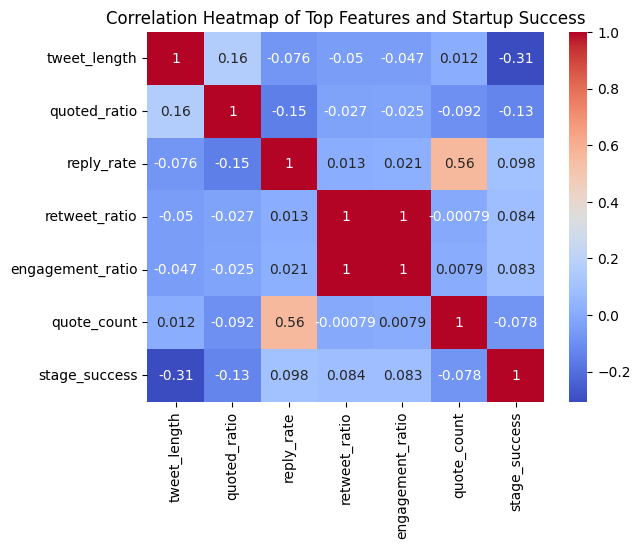

In [214]:
top6_features = [ 'tweet_length', 'quoted_ratio', 'reply_rate', 'retweet_ratio', 'engagement_ratio', 'quote_count', 'stage_success']

top_corr = startups[top6_features].corr()

sns.heatmap(top_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Top Features and Startup Success")
plt.show()

<Axes: >

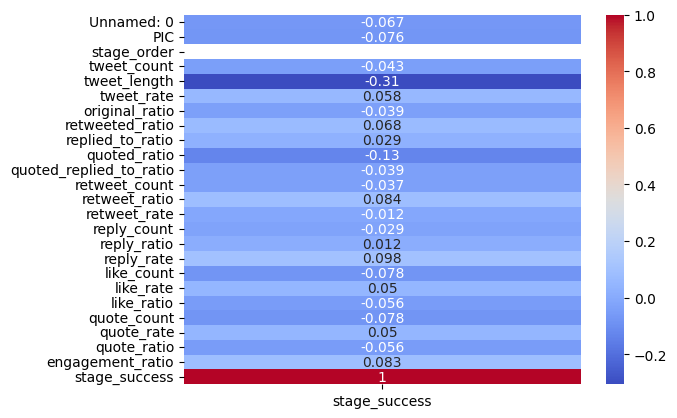

In [215]:
correlation_values = startups.corr(numeric_only=True)[['stage_success']] 
sns.heatmap(correlation_values, annot=True, cmap="coolwarm")

In this section we created some visualizations of the features selceted with the higher correlation to the target variable, only to see how was the variables distributed,
because random distributions across the target affect the predictive power. Also to see the outliers the data might have. 

As seen in the graphs, mostly all the variables are right skewed following but in some cases with random distribution. 

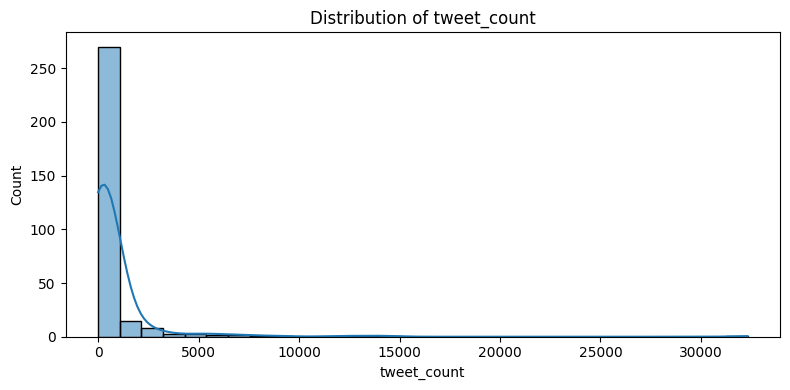

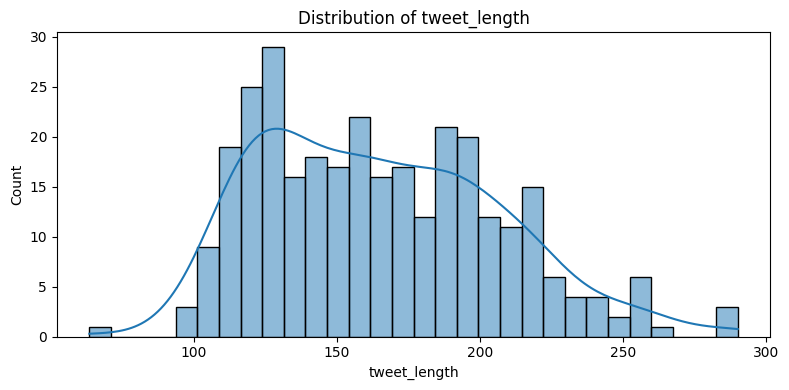

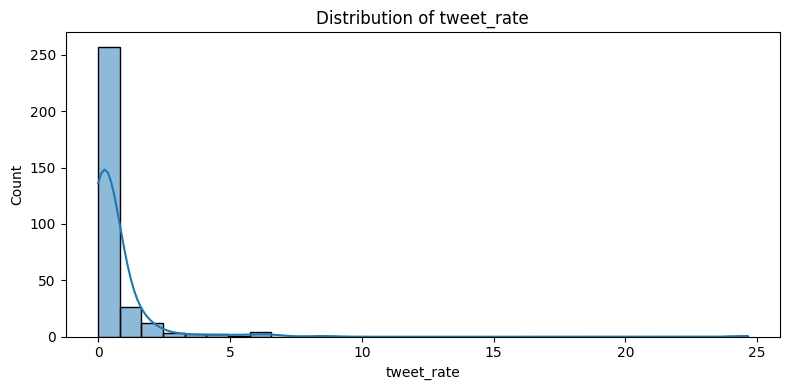

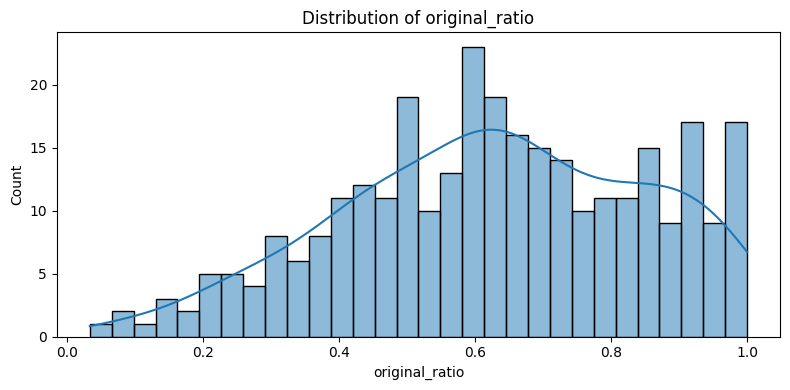

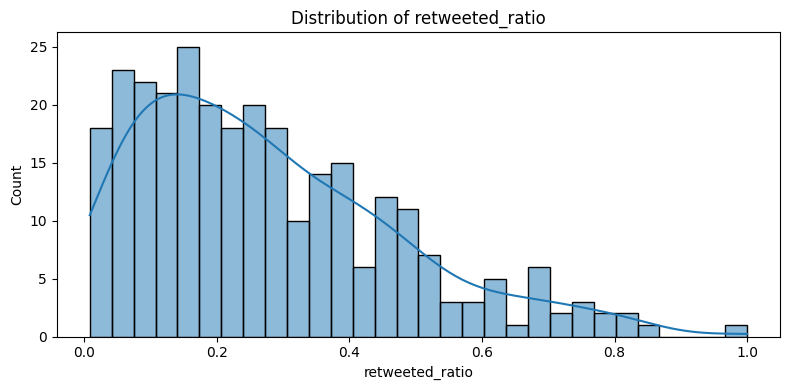

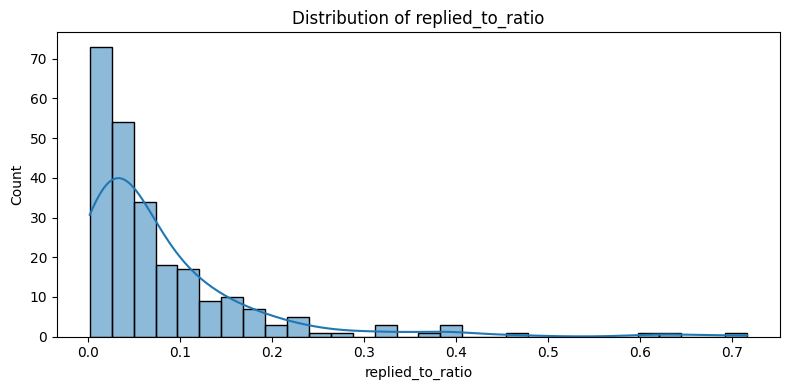

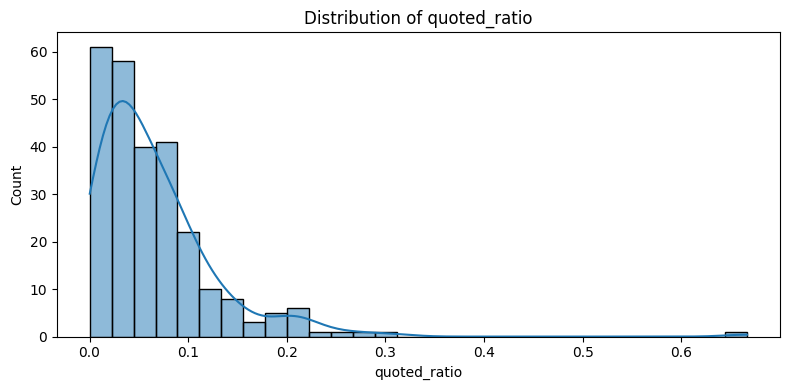

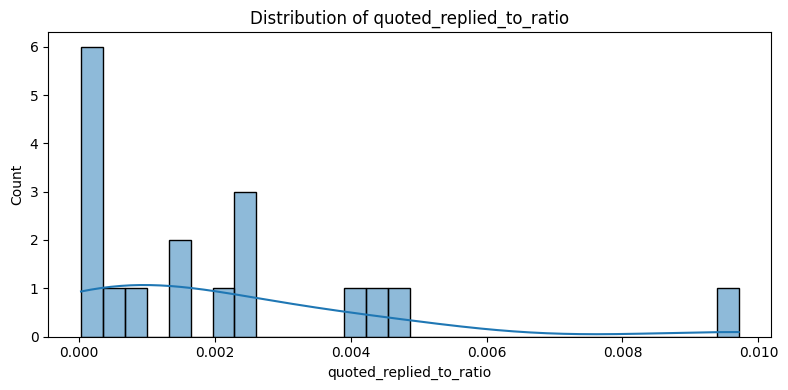

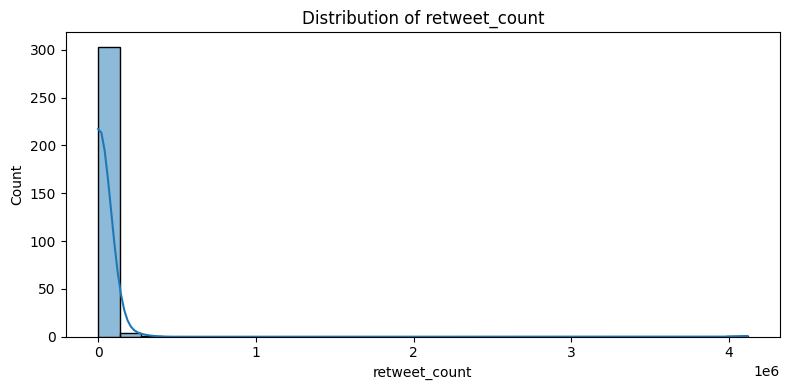

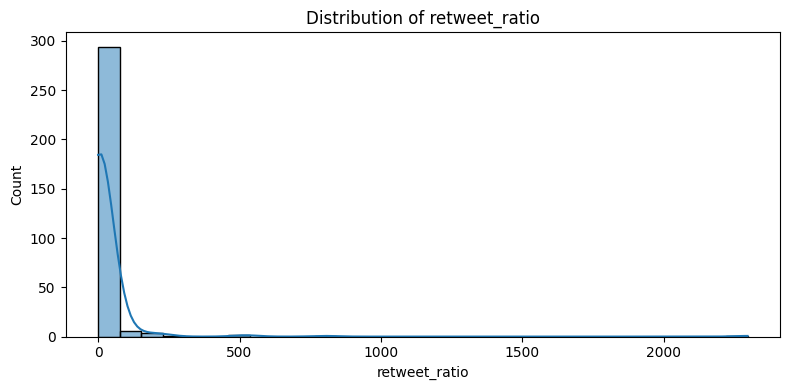

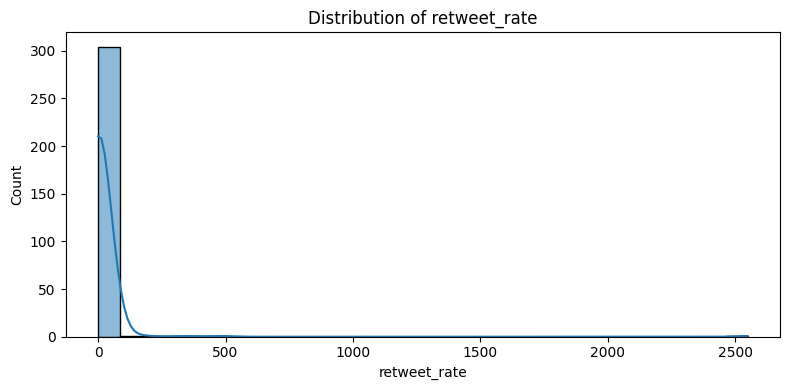

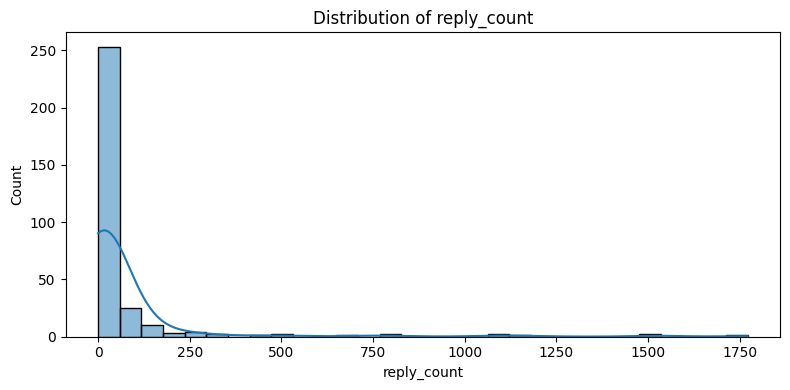

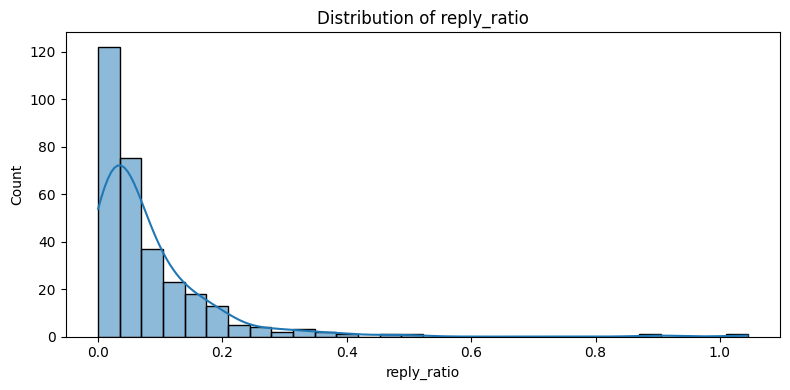

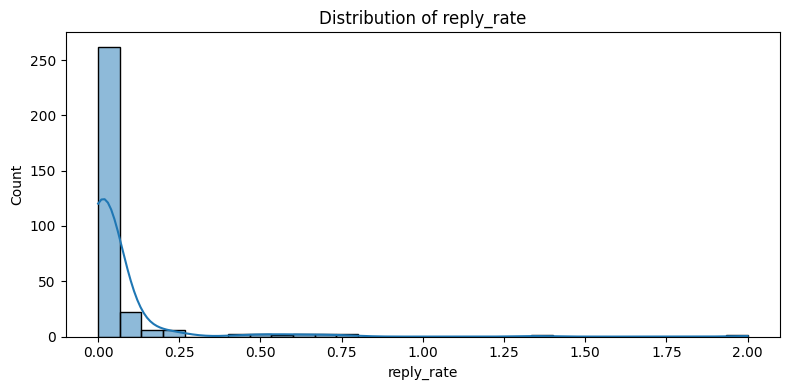

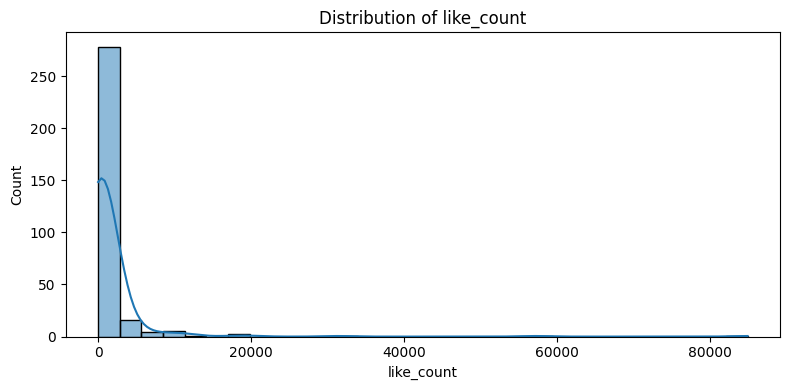

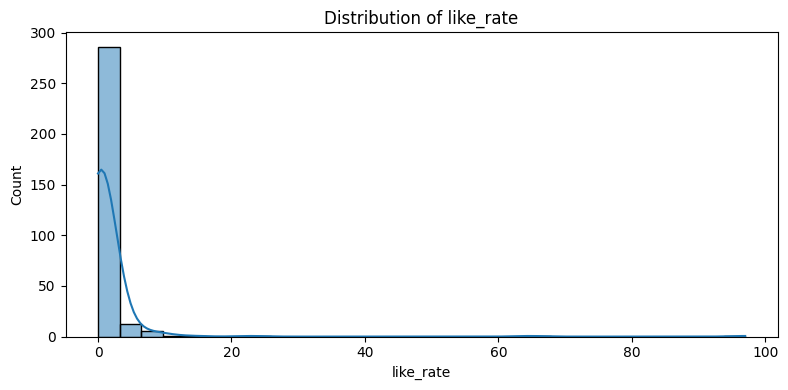

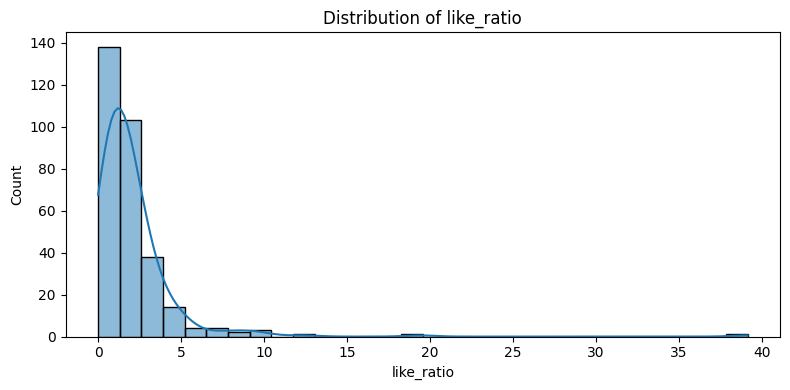

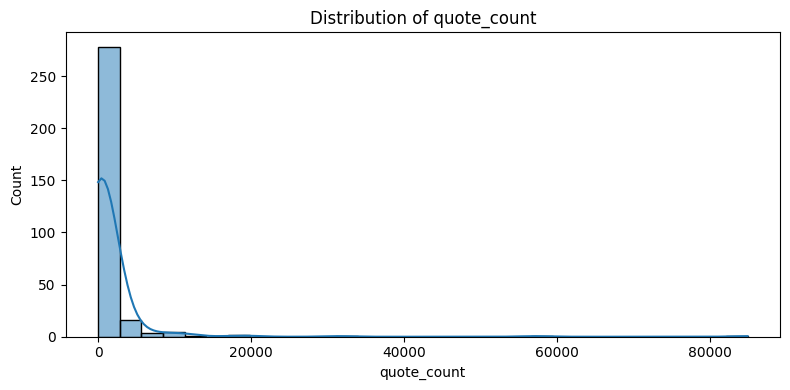

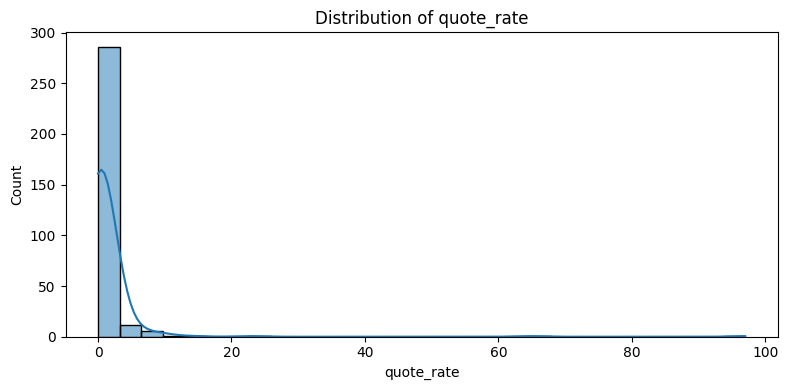

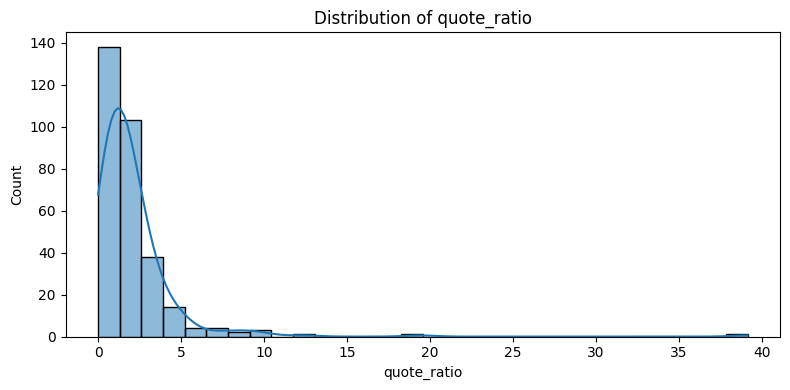

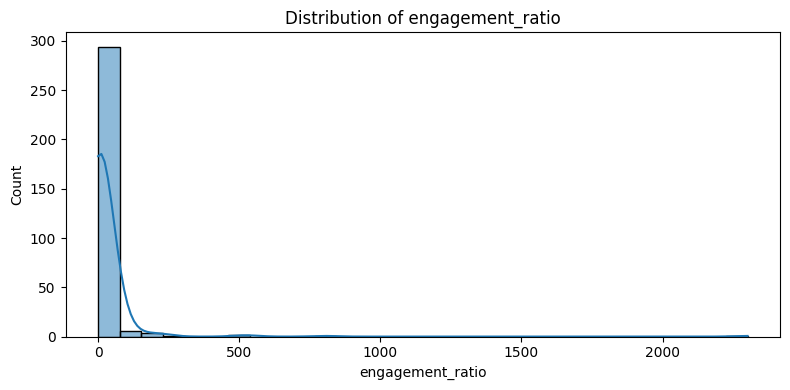

In [216]:
for col in startups.select_dtypes(include='float64').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(startups[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()



In [217]:
startups['stage_success'].value_counts()

stage_success
0    589
1    111
Name: count, dtype: int64

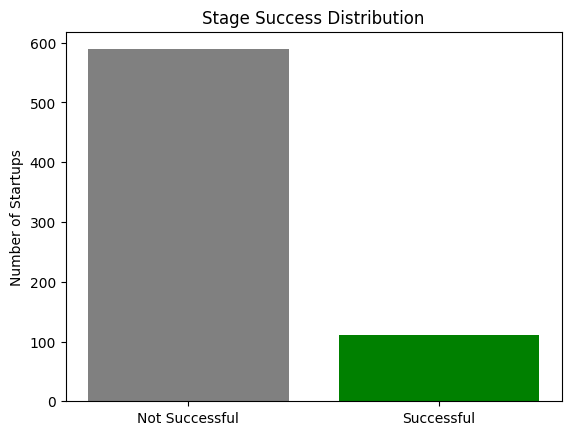

In [311]:
labels = ['Not Successful', 'Successful']
counts = [589, 111]

plt.bar(labels, counts, color=['gray', 'green'])
plt.title('Stage Success Distribution')
plt.ylabel('Number of Startups')
plt.show()


In [218]:
startups.isna().sum().sort_values(ascending=False)

quoted_replied_to_ratio    682
replied_to_ratio           457
quoted_ratio               441
retweeted_ratio            411
original_ratio             393
tweet_length               391
reply_rate                 391
reply_ratio                391
reply_count                391
retweet_rate               391
retweet_ratio              391
retweet_count              391
tweet_rate                 391
tweet_count                391
like_count                 391
like_rate                  391
like_ratio                 391
quote_count                391
quote_rate                 391
quote_ratio                391
engagement_ratio           391
web                         51
stage_name                   0
stage_order                  0
city                         0
Unnamed: 0                   0
name                         0
country                      0
PIC                          0
stage_success                0
dtype: int64

In [219]:
columns_dropped = startups.isna().sum().sort_values(ascending=False).head(4).index
startups2 = startups.drop(columns=columns_dropped)
startups2.isna().sum().sort_values(ascending=False)

original_ratio      393
tweet_length        391
reply_rate          391
reply_ratio         391
reply_count         391
retweet_rate        391
retweet_ratio       391
retweet_count       391
tweet_rate          391
tweet_count         391
like_count          391
like_rate           391
like_ratio          391
quote_count         391
quote_rate          391
quote_ratio         391
engagement_ratio    391
web                  51
stage_order           0
stage_name            0
city                  0
PIC                   0
country               0
name                  0
Unnamed: 0            0
stage_success         0
dtype: int64

In [220]:
startups2.drop(columns=["Unnamed: 0", "name", "country", "web", "PIC","city","stage_name","original_ratio"],inplace=True)
correlation_values = abs(startups2.corr(numeric_only=True)['stage_success']).drop('stage_success')
correlation_values = correlation_values.sort_values(ascending=False)[:10]
features_names = correlation_values.index

In [221]:
startups2.dropna(inplace=True)

In [222]:
startups2['stage_success'].value_counts()

stage_success
0    223
1     86
Name: count, dtype: int64

In [223]:
X = startups2[features_names]
y = startups2['stage_success']

In [224]:
X.columns

Index(['tweet_length', 'reply_rate', 'retweet_ratio', 'engagement_ratio',
       'like_count', 'quote_count', 'tweet_rate', 'quote_ratio', 'like_ratio',
       'like_rate'],
      dtype='object')

<Axes: >

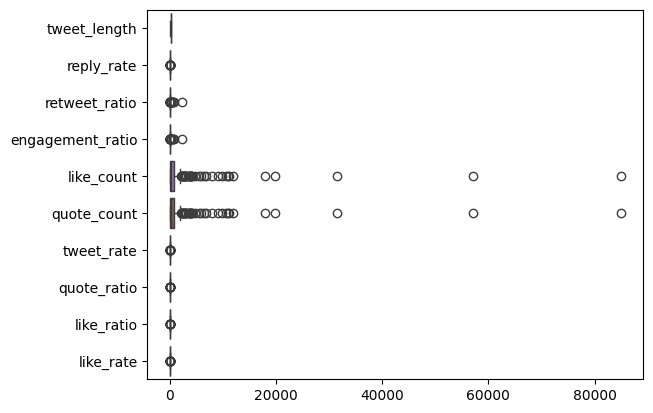

In [312]:
sns.boxplot(X, orient='h')

In [225]:
numerical_features = X.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['tweet_length', 'reply_rate', 'retweet_ratio', 'engagement_ratio',
       'like_count', 'quote_count', 'tweet_rate', 'quote_ratio', 'like_ratio',
       'like_rate'],
      dtype='object')

In [226]:
scaler = preprocessing.StandardScaler()
X_num_scaled = scaler.fit_transform(X[numerical_features])
X_num_scaled = pd.DataFrame(X_num_scaled, index=X.index, columns=X.columns)

<Axes: >

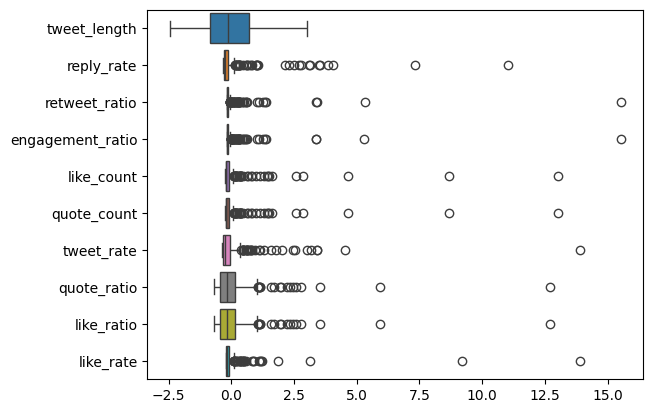

In [313]:
sns.boxplot(X_num_scaled, orient='h')

In [227]:
y.value_counts()/y.shape[0]

stage_success
0    0.721683
1    0.278317
Name: count, dtype: float64

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X_num_scaled, y, test_size=0.2, random_state=40, stratify=y, shuffle=True)

## Logistic Regression

In [229]:
log_reg = LogisticRegression(max_iter= 1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [230]:
y_pred_lr = log_reg.predict(X_test)

In [231]:
y_pred_prob_lr = log_reg.predict_proba(X_test)[:,1]

In [232]:
metrics.accuracy_score(y_test, y_pred_lr)

0.7258064516129032

In [233]:
metrics.recall_score(y_test,y_pred_lr)

0.7647058823529411

In [234]:
metrics.precision_score(y_test, y_pred_lr)

0.5

In [235]:
metrics.f1_score(y_test, y_pred_lr)

0.6046511627906976

In [236]:
metrics.roc_auc_score(y_test, y_pred_lr)

np.float64(0.7379084967320261)

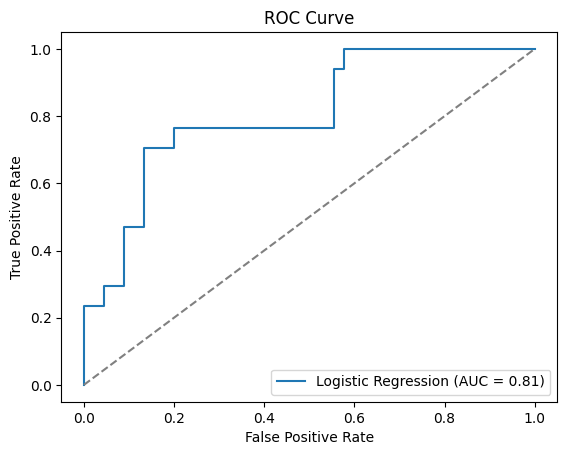

In [237]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_prob_lr)))
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<Axes: >

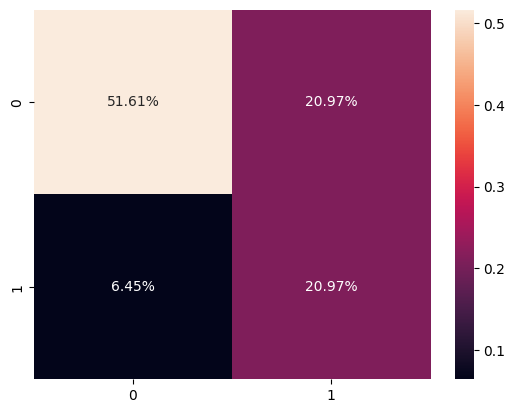

In [238]:
cm = metrics.confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%")

In [239]:
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test, y_pred_lr).ravel()
total_lr = tn_lr + fp_lr + fn_lr + tp_lr

tp_pct_lr = tp_lr / total_lr
fp_pct_lr = fp_lr / total_lr
fn_pct_lr = fn_lr / total_lr
tn_pct_lr = tn_lr / total_lr


TP_value = 2_500_000
FP_value = -500_000
FN_value = 0
TN_value = 0

expected_value_lr = (tp_pct_lr * TP_value) + (fp_pct_lr * FP_value)  

print(f"Expected Value of Logistic Regression (based on percentage): ${expected_value_lr:,.0f}")
print(f"TP of LR: {tp_lr} ({tp_pct_lr:.2%})")
print(f"FP of LR: {fp_lr} ({fp_pct_lr:.2%})")

Expected Value of Logistic Regression (based on percentage): $419,355
TP of LR: 13 (20.97%)
FP of LR: 13 (20.97%)


## Decision Tree

In [240]:
Tree = DecisionTreeClassifier(criterion='entropy', max_depth = 10, max_leaf_nodes = 19)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=19)

In [241]:
tree_predictions = Tree.predict(X_test)

In [242]:
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_test, tree_predictions))

Decision Trees's Accuracy:  0.7580645161290323


In [243]:
print("Decision Tree F1 score:", metrics.f1_score(y_test, tree_predictions))

Decision Tree F1 score: 0.6153846153846154


In [244]:
print("Decision Tree ROC_AUC score:", metrics.roc_auc_score(y_test, tree_predictions))

Decision Tree ROC_AUC score: 0.7418300653594772


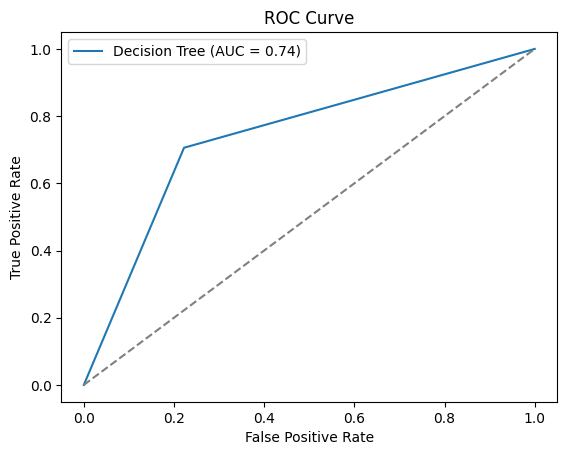

In [245]:
fpr, tpr, _ = roc_curve(y_test, tree_predictions)
plt.plot(fpr, tpr, label="Decision Tree (AUC = {:.2f})".format(roc_auc_score(y_test, tree_predictions)))
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<Axes: >

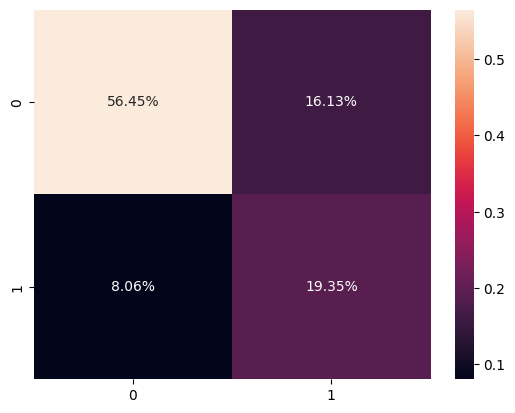

In [246]:
cm = metrics.confusion_matrix(y_test, tree_predictions)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%")

[Text(0.4868421052631579, 0.9444444444444444, 'tweet_length <= -0.087\nentropy = 0.855\nsamples = 247\nvalue = [178, 69]'),
 Text(0.23684210526315788, 0.8333333333333334, 'tweet_rate <= -0.349\nentropy = 0.975\nsamples = 130\nvalue = [77, 53]'),
 Text(0.3618421052631579, 0.8888888888888888, 'True  '),
 Text(0.10526315789473684, 0.7222222222222222, 'retweet_ratio <= -0.176\nentropy = 0.323\nsamples = 17\nvalue = [16, 1]'),
 Text(0.05263157894736842, 0.6111111111111112, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15789473684210525, 0.6111111111111112, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.3684210526315789, 0.7222222222222222, 'retweet_ratio <= -0.155\nentropy = 0.995\nsamples = 113\nvalue = [61.0, 52.0]'),
 Text(0.2631578947368421, 0.6111111111111112, 'retweet_ratio <= -0.162\nentropy = 0.982\nsamples = 57\nvalue = [24, 33]'),
 Text(0.21052631578947367, 0.5, 'entropy = 1.0\nsamples = 47\nvalue = [23.0, 24.0]'),
 Text(0.3157894736842105, 0.5, 'entropy = 0.469

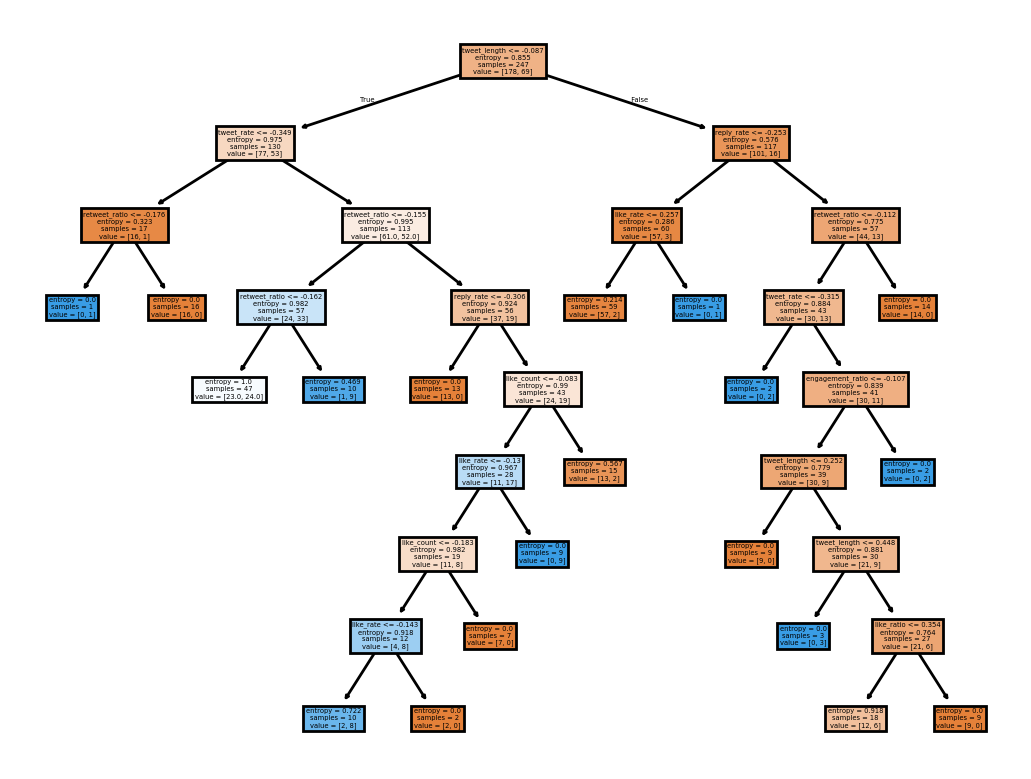

In [247]:
features = list(X)
plt.figure(dpi= 200)
plot_tree(Tree, feature_names=features, filled=True)

Text(0.5, 0, 'max_depth')

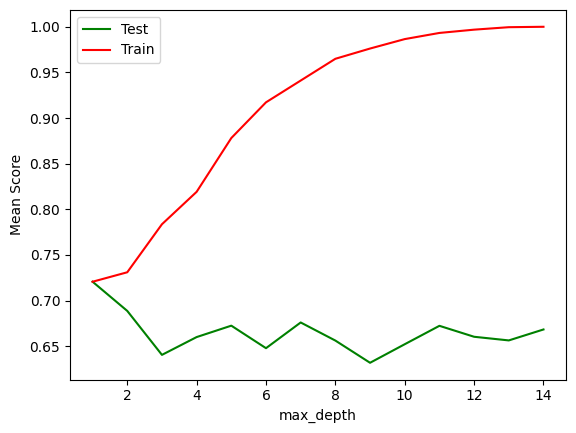

In [248]:
param_grid = {'max_depth':range(1, 15)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
ax = sns.lineplot(data=scores, x='param_max_depth', y='mean_test_score', color='green', label='Test')
sns.lineplot(data=scores, x='param_max_depth', y='mean_train_score', color='red', label='Train')
ax.set_ylabel('Mean Score')
ax.set_xlabel('max_depth')

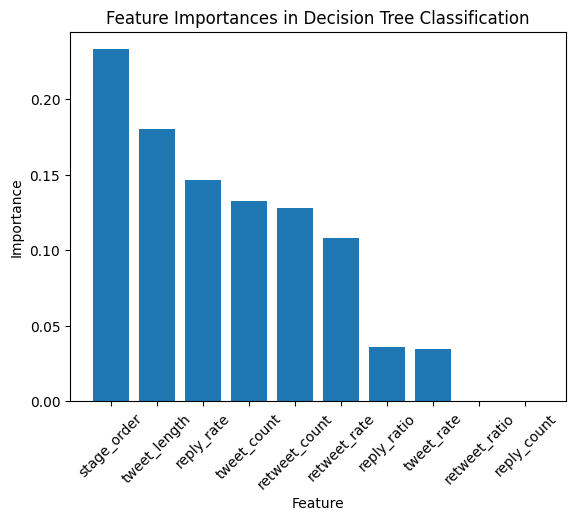

In [249]:
# Feature importances
importances = Tree.feature_importances_
indices = np.argsort(importances)[::-1]
features = startups2.columns

plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Decision Tree Classification")
plt.show()

In [250]:
tn_tree, fp_tree, fn_tree, tp_tree = confusion_matrix(y_test, tree_predictions).ravel()
total_tree = tn_tree + fp_tree + fn_tree + tp_tree

tp_pct_tree = tp_tree / total_tree
fp_pct_tree = fp_tree / total_tree
fn_pct_tree = fn_tree / total_tree
tn_pct_tree = tn_tree / total_tree


TP_value = 2_500_000
FP_value = -500_000
FN_value = 0
TN_value = 0

expected_value_tree = (tp_pct_tree * TP_value) + (fp_pct_tree * FP_value)  

print(f"Expected Value of Decision Tree (based on percentage): ${expected_value_tree:,.0f}")
print(f"TP of Tree: {tp_tree} ({tp_pct_tree:.2%})")
print(f"FP of Tree: {fp_tree} ({fp_pct_tree:.2%})")

Expected Value of Decision Tree (based on percentage): $403,226
TP of Tree: 12 (19.35%)
FP of Tree: 10 (16.13%)


## Random Forest

In [300]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [301]:
y_pred_rf = rf_clf.predict(X_test)

In [302]:
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, y_pred_rf))

Random Forest's Accuracy:  0.8709677419354839


In [303]:
print("Precision score:", metrics.precision_score(y_test, y_pred_rf))

Precision score: 0.8461538461538461


In [305]:
print("Recall score:", metrics.recall_score(y_test, y_pred_rf))

Recall score: 0.6470588235294118


In [306]:
print("F1 score:", metrics.f1_score(y_test, y_pred_rf))

F1 score: 0.7333333333333333


In [307]:
print("ROC AUC:", roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]))

ROC AUC: 0.815686274509804


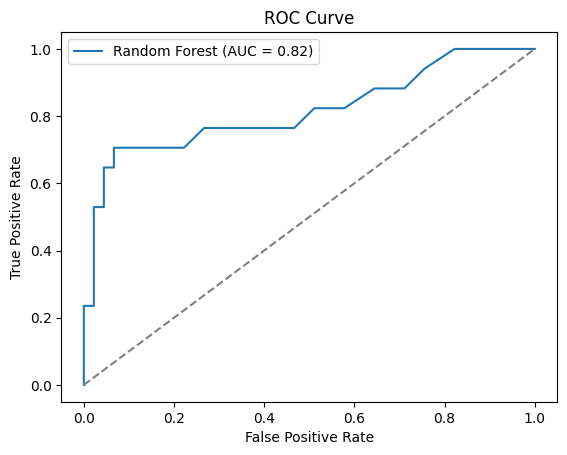

In [258]:
fpr, tpr, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1])))
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<Axes: >

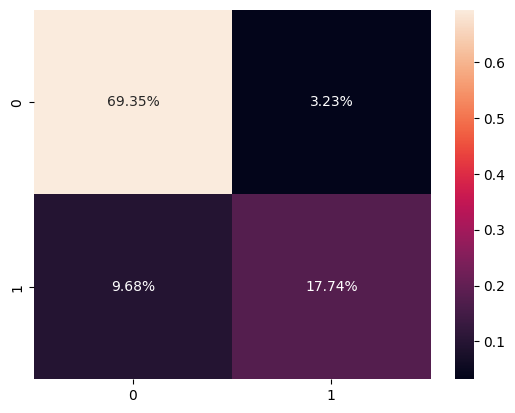

In [259]:
cm = metrics.confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%")

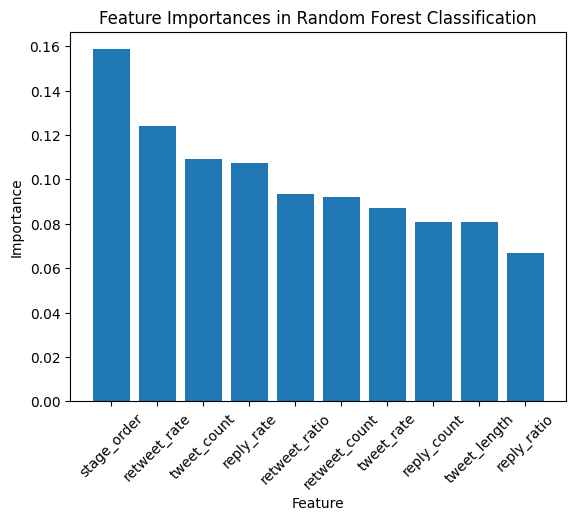

In [ ]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = startups2.columns

plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Classification")
plt.show()

In [261]:
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_rf).ravel()
total_rf = tn_rf + fp_rf + fn_rf + tp_rf

tp_pct_rf = tp_rf / total_rf
fp_pct_rf = fp_rf / total_rf
fn_pct_rf = fn_rf / total_rf
tn_pct_rf = tn_rf / total_rf

TP_value = 2_500_000
FP_value = -500_000
FN_value = 0
TN_value = 0

expected_value_rf = (tp_pct_rf * TP_value) + (fp_pct_rf * FP_value)  

print(f"Expected Value of Random Forest (based on percentage): ${expected_value_rf:,.0f}")
print(f"TP of RF: {tp_rf} ({tp_pct_rf:.2%})")
print(f"FP of RF: {fp_rf} ({fp_pct_rf:.2%})")

Expected Value of Random Forest (based on percentage): $427,419
TP of RF: 11 (17.74%)
FP of RF: 2 (3.23%)


## Gradient Boosting

In [262]:
gradient_model = GradientBoostingClassifier( n_estimators=100,learning_rate=0.2,max_depth=4,random_state=40)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, random_state=40)

In [263]:
y_pred_gb = gradient_model.predict(X_test)
y_pred_prob_gb = gradient_model.predict_proba(X_test)[:, 1]

In [264]:
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Accuracy: 0.8225806451612904


In [265]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.69      0.65      0.67        17

    accuracy                           0.82        62
   macro avg       0.78      0.77      0.77        62
weighted avg       0.82      0.82      0.82        62



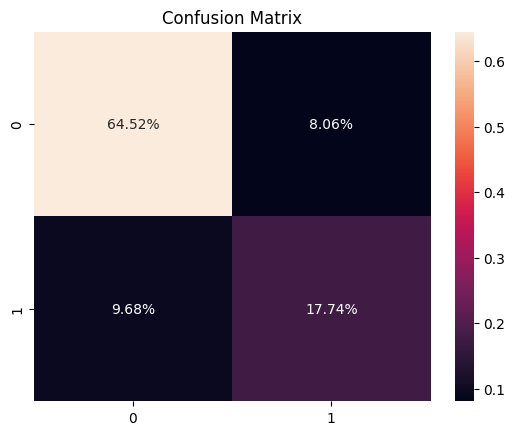

In [284]:
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%")
plt.title("Confusion Matrix")
plt.show()

In [267]:
print("F1 score:", f1_score(y_test, y_pred_gb))

F1 score: 0.6666666666666666


In [268]:
print("Precision Score:", precision_score(y_test, y_pred_gb))

Precision Score: 0.6875


In [269]:
print("Recall Score:", recall_score(y_test, y_pred_gb))

Recall Score: 0.6470588235294118


In [270]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_gb))

ROC-AUC Score: 0.8143790849673203


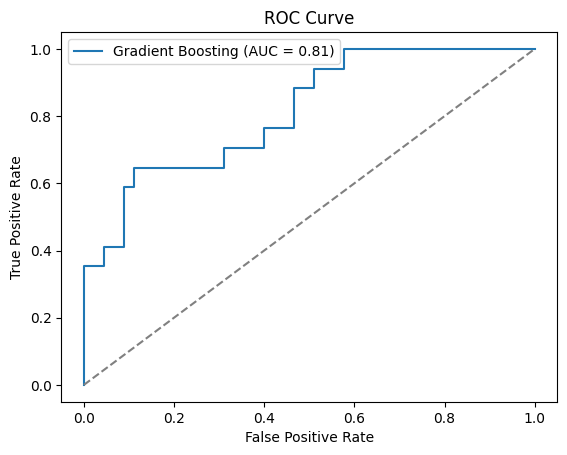

In [271]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_gb)
plt.plot(fpr, tpr, label="Gradient Boosting (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_prob_gb)))
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


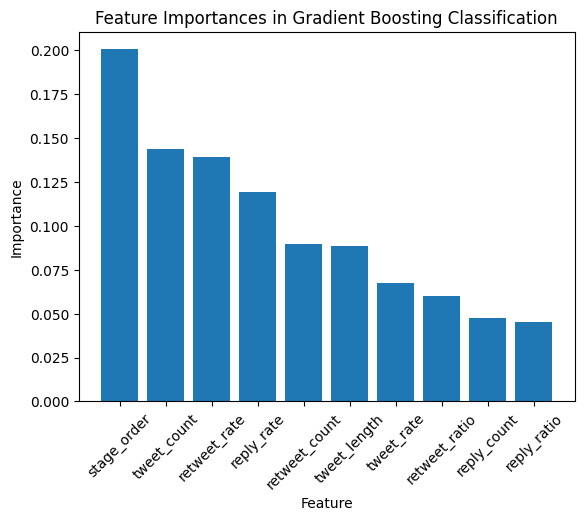

In [272]:
# Feature importances
importances = gradient_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = startups2.columns

plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Gradient Boosting Classification")
plt.show()

In [273]:
tn_gb, fp_gb, fn_gb, tp_gb = confusion_matrix(y_test, y_pred_gb).ravel()
total_gb = tn_gb + fp_gb + fn_gb + tp_gb

tp_pct_gb = tp_gb / total_gb
fp_pct_gb = fp_gb / total_gb
fn_pct_gb = fn_gb / total_gb
tn_pct_gb = tn_gb / total_gb


TP_value = 2_500_000
FP_value = -500_000
FN_value = 0
TN_value = 0

expected_value_gb = (tp_pct_gb * TP_value) + (fp_pct_gb * FP_value)  

print(f"Expected Value of Gradient Boosting (based on percentage): ${expected_value_gb:,.0f}")
print(f"TP of GB: {tp_gb} ({tp_pct_gb:.2%})")
print(f"FP of GB: {fp_gb} ({fp_pct_gb:.2%})")

Expected Value of Gradient Boosting (based on percentage): $403,226
TP of GB: 11 (17.74%)
FP of GB: 5 (8.06%)


## Metrics Analysis

In [274]:
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
y_preds = [y_pred_lr, tree_predictions, y_pred_rf, y_pred_gb]

metrics = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

for y_pred in y_preds:
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred, average='binary'))  
    metrics["Recall"].append(recall_score(y_test, y_pred, average='binary'))
    metrics["F1-Score"].append(f1_score(y_test, y_pred, average='binary'))

metrics_df = pd.DataFrame(metrics, index=model_names)
print("Model Performance Metrics:")
print(metrics_df)


Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.725806   0.500000  0.764706  0.604651
Decision Tree        0.758065   0.545455  0.705882  0.615385
Random Forest        0.870968   0.846154  0.647059  0.733333
Gradient Boosting    0.822581   0.687500  0.647059  0.666667


## Expected Values Analysis

In [275]:
ev_final_df = pd.DataFrame({
    "Expected Value ($)": [expected_value_lr, expected_value_tree, expected_value_rf, expected_value_gb],
    "TP": [tp_lr, tp_tree, tp_rf, tp_gb],
    "TP (%)": [f"{tp_pct_lr:.2%}", f"{tp_pct_tree:.2%}", f"{tp_pct_rf:.2%}", f"{tp_pct_gb:.2%}"],
    "FP": [fp_lr, fp_tree, fp_rf, fp_gb],
    "FP (%)": [f"{fp_pct_lr:.2%}", f"{fp_pct_tree:.2%}", f"{fp_pct_rf:.2%}", f"{fp_pct_gb:.2%}"]
}, index=["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"])

print("Final Expected Value Table:")
print(ev_final_df)


Final Expected Value Table:
                     Expected Value ($)  TP  TP (%)  FP  FP (%)
Logistic Regression       419354.838710  13  20.97%  13  20.97%
Decision Tree             403225.806452  12  19.35%  10  16.13%
Random Forest             427419.354839  11  17.74%   2   3.23%
Gradient Boosting         403225.806452  11  17.74%   5   8.06%


<Axes: ylabel='Expected Value ($)'>

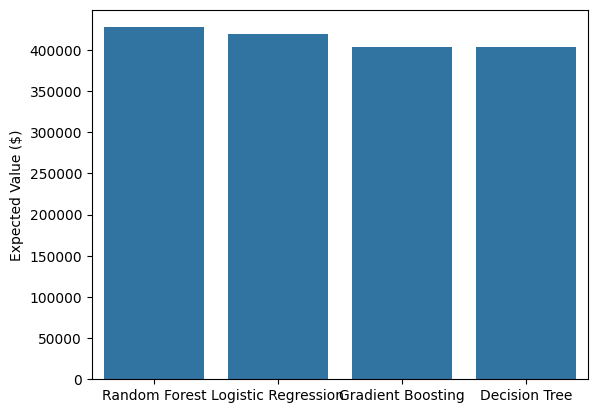

In [276]:
sns.barplot(ev_final_df['Expected Value ($)'].sort_values(ascending=False))

## ROI calculation

In [ ]:
pred_pos_lr = 13 + 13
pred_pos_tree = 12 + 10
pred_pos_rf = 11 + 2
pred_pos_gb = 11 + 5

Suposing a cost per startup of 50,000€, we calculate the ROI as (Expected Value - Investment)/Investment

In [278]:
cost_per_prediction = 50_000

investment_lr = pred_pos_lr * cost_per_prediction
investment_tree = pred_pos_tree * cost_per_prediction
investment_rf = pred_pos_rf * cost_per_prediction
investment_gb = pred_pos_gb * cost_per_prediction

# ROI = (Expected Value - Investment) / Investment
roi_lr = (expected_value_lr - investment_lr) / investment_lr
roi_dt = (expected_value_tree - investment_tree) / investment_tree
roi_rf = (expected_value_rf - investment_rf) / investment_rf
roi_gb = (expected_value_gb - investment_gb) / investment_gb

roi_df = pd.DataFrame({
    "Expected Value ($)": [expected_value_lr, expected_value_tree, expected_value_rf, expected_value_gb],
    "Investment ($)": [investment_lr, investment_tree, investment_rf, investment_gb],
    "ROI": [roi_lr, roi_dt, roi_rf, roi_gb]
}, index=["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"])

roi_df["ROI (%)"] = roi_df["ROI"].apply(lambda x: f"{x:.2%}")

print("ROI Table by Model:")
print(roi_df)

ROI Table by Model:
                     Expected Value ($)  Investment ($)       ROI  ROI (%)
Logistic Regression       419354.838710         1300000 -0.677419  -67.74%
Decision Tree             403225.806452         1100000 -0.633431  -63.34%
Random Forest             427419.354839          650000 -0.342432  -34.24%
Gradient Boosting         403225.806452          800000 -0.495968  -49.60%


<Axes: ylabel='ROI'>

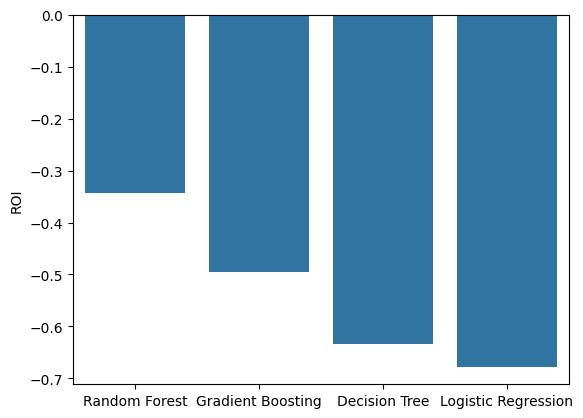

In [279]:
sns.barplot(roi_df['ROI'].sort_values(ascending=False
                                      ))

Among all models, **Random Forest** emerged as the most effective and profitable solution:

- It achieved the highest expected value ($427,419), indicating that its predictions maximize business profit better than the alternatives.

- Even tough all the ROI values are negatives, which means that the profit can not cover the inversion, Random forest highlights for being the least negative. (-34.24%)

- Despite having slightly fewer true positives (TP = 11) than Logistic Regression (TP = 13), Random Forest kept false positives extremely low (FP = 2), which is crucial in our context given that each FP carries a substantial cost (-$500,000).

- It delivered the highest precision (0.85) and F1-score (0.73), reflecting a strong balance between capturing successful startups and avoiding incorrect positive predictions.

- It's accuracy (87%) significantly outperformed the other models, adding confidence in its overall predictive ability.

In summary, Random Forest not only performs well technically, but also delivers the best economic outcome, making it the most suitable model for deployment in this startup evaluation scenario. Its ability to minimize costly mistakes while maintaining a solid recall of successful ventures ensures both reliability and profitability.

### Hyperparameter Tuning

In [ ]:
rf_best = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_best, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [289]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

### Best 5 startups using Random Forest model

In [280]:
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

In [281]:
X_test_indices = X_test.index

In [282]:
results_df = pd.DataFrame({
    "Startup Index": X_test_indices,
    "Predicted Success Probability": y_proba_rf
})

results_df = results_df.merge(startups[["name"]], left_on="Startup Index", right_index=True)

top_5_startups = results_df.sort_values(by="Predicted Success Probability", ascending=False).head(5)

print("Top 5 Startups Most Likely to Succeed to invest on them:")
print(top_5_startups[["name", "Predicted Success Probability"]])

Top 5 Startups Most Likely to Succeed to invest on them:
                name  Predicted Success Probability
6   SIRIUSXT LIMITED                           0.76
36  SHERPA EUROPE SL                           0.73
35   FLUIDLY LIMITED                           0.70
60           PAYPLUG                           0.70
10        PKVITALITY                           0.69


The startups that have the highest probability to succeed to make the investment. 
As we can see they all have a probability of success between 0.7 and 0.8, except the last one that have a probability of success a little bit lower. 

#### Validation of the results 

In [314]:
best_startups = ['SIRIUSXT LIMITED', 'SHERPA EUROPE SL', 'FLUIDLY LIMITED', 'PAYPLUG', 'PKVITALITY']
best_startups_df = startups.loc[startups['name'].isin(best_startups)]
best_startups_df[['name','stage_success']]

,name,stage_success
158,PAYPLUG,1
170,PKVITALITY,0
284,SHERPA EUROPE SL,1
445,SIRIUSXT LIMITED,1
560,FLUIDLY LIMITED,1


Checking on the main dataset to see if the startups actually succeed or did not, we have seen that only the one with a probability of success lower than 0.7 have actually failed.

To conclude, in this project we built a model to predict startup stage success using Twitter engagement data and relevant features. After cleaning the dataset and selecting meaningful variables, we tested four machine learning models.

**Random Forest** delivered the best performance, with the highest accuracy and F1-score, proving to be the most reliable for predicting success.

With more time, we could improve the model by:
- Engineering new features from time patterns or engagement dynamics
- Incorporating text analysis of tweets to capture sentiment or topics
- Applying advanced validation like cross-validation to ensure generalization
- Adding external data, such as funding rounds or market trends

This project shows the potential of using social media data to support startup evaluation and decision-making.